Welcome to Poker!
Both players placed a blind of 10 tokens.
Pot starts at 20 tokens.
Your hand: [3 of Spades, 8 of Spades]
Opponent's hand is hidden.
Dealing Flop...
Community cards: [7 of Diamonds, 10 of Clubs, King of Clubs]
Starting Flop betting round...
Your tokens: 90, Pot: 20
Opponent's current bet: 0
Actions: [1] Call, [2] Raise, [3] Fold


Your choice:  1


You called with 0 tokens.
Game:  [Call]
Opponent Calls
Bets are equal. Ending betting round.
Dealing Turn...
Community cards: [7 of Diamonds, 10 of Clubs, King of Clubs, 5 of Clubs]
Starting Turn betting round...
Your tokens: 90, Pot: 20
Opponent's current bet: 0
Actions: [1] Call, [2] Raise, [3] Fold


Your choice:  1


You called with 0 tokens.
Game:  [Call]
Opponent Calls
Bets are equal. Ending betting round.
Dealing River...
Community cards: [7 of Diamonds, 10 of Clubs, King of Clubs, 5 of Clubs, 7 of Hearts]
Starting River betting round...
Your tokens: 90, Pot: 20
Opponent's current bet: 0
Actions: [1] Call, [2] Raise, [3] Fold


Your choice:  2
Enter your raise amount (minimum 1):  12


You raised to 12 tokens.
Game:  [Call]
Opponent calls 12 tokens.
Game:  [Call]
Opponent Calls
Bets are equal. Ending betting round.
Comparing hands...
Your best hand: One Pair with ranks [5, 11, 8, 6]
Opponent's best hand: One Pair with ranks [5, 11, 8, 7]


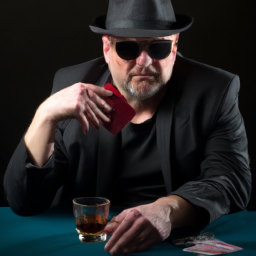

C:\Users\Johns\AppData\Local\Temp\ipykernel_37264\3740766228.py:564: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  responseVA.stream_to_file("winVoiceline.mp3")


Opponent wins the hand!
Tokens - You: 78, Opponent: 122


Play another round? (y/n):  y


Both players placed a blind of 10 tokens.
Pot starts at 20 tokens.
Your hand: [8 of Hearts, 2 of Hearts]
Opponent's hand is hidden.
Dealing Flop...
Community cards: [9 of Spades, 5 of Spades, King of Hearts]
Starting Flop betting round...
Your tokens: 68, Pot: 20
Opponent's current bet: 0
Actions: [1] Call, [2] Raise, [3] Fold


Your choice:  1


You called with 0 tokens.
Game:  [Call]
Opponent Calls
Bets are equal. Ending betting round.
Dealing Turn...
Community cards: [9 of Spades, 5 of Spades, King of Hearts, 3 of Hearts]
Starting Turn betting round...
Your tokens: 68, Pot: 20
Opponent's current bet: 0
Actions: [1] Call, [2] Raise, [3] Fold


Your choice:  1


You called with 0 tokens.
Game:  [Call]
Opponent Calls
Bets are equal. Ending betting round.
Dealing River...
Community cards: [9 of Spades, 5 of Spades, King of Hearts, 3 of Hearts, 4 of Clubs]
Starting River betting round...
Your tokens: 68, Pot: 20
Opponent's current bet: 0
Actions: [1] Call, [2] Raise, [3] Fold


Your choice:  1


You called with 0 tokens.
Game:  [Call]
Opponent Calls
Bets are equal. Ending betting round.
Comparing hands...
Your best hand: High Card with ranks [11, 7, 6, 3, 2]
Opponent's best hand: One Pair with ranks [4, 11, 7, 3]


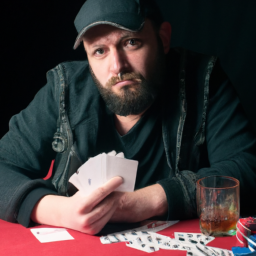

C:\Users\Johns\AppData\Local\Temp\ipykernel_37264\3740766228.py:526: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  responseVA.stream_to_file("winVoiceline.mp3")


Opponent wins the hand!
Tokens - You: 68, Opponent: 132


In [ ]:
# import random
from collections import Counter
from pathlib import Path
from openai import OpenAI
import warnings
import IPython
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display, HTML
import random

# PASTE API KEYS HERE

user_input = "begin"
game_running = True
character_text = 'You are a futureistic robot that plays only the correct play, you know when to bluff and when to fold and follow your strict guidelines'
character_text2 = 'You are an old western gunslinger and you love whiskey and poker, your signature style is bluffing your opponent and playing hands that you probably shouldn\'t.'

# Messages for the ChatGPT RPG instance
CHATGPT_POKER_MESSAGES = [
    {
        "role": "system",

        "content": "I want you to act as a poker player with the " + character_text2 + "personality. Given their personality please take the input of a poker game state and respond with how you would like to procede. ONLY RETURN IN ONE OF 3 WAYS. 1. [Call] 2. [Fold] 3. [Raise:x] (where x is the integer number of chips you are raising). Only return in exactly that format and remember to adhere to that response strictly."
    }
]
CHATGPT_POKER_WIN_VOICELINES = [
    {
        "role": "system",

        "content": "I want you to act as a poker player with the " + character_text2 + " personality. Given their personality please generate a voice line for whenever they would win the hand."
    }
]
CHATGPT_POKER_FOLD_VOICELINES = [
    {
        "role": "system",

        "content": "I want you to act as a poker player with the " + character_text2 + " personality. Given their personality please generate a voice line for whenever they would fold."
    }
]
def get_fold_voiceline_from_gpt(game_state):
    CHATGPT_POKER_FOLD_VOICELINES.append(
        {
            "role" : "user",
            "content" : "give me a voiceline"
        }
    )

    completionVA = voiceClient.chat.completions.create(
        model="gpt-4o-mini",
        messages=CHATGPT_POKER_FOLD_VOICELINES,
        max_tokens=2048
    )

    # Append newest response to the chat array (context)
    message = completionVA.choices[0].message
    CHATGPT_POKER_FOLD_VOICELINES.append( message )

    # Return the message text to the game loop / user
    return message.content

def get_win_voiceline_from_gpt(game_state):
    CHATGPT_POKER_WIN_VOICELINES.append(
        {
            "role" : "user",
            "content" : "give me a voiceline"
        }
    )

    completionVA = voiceClient.chat.completions.create(
        model="gpt-4o-mini",
        messages=CHATGPT_POKER_WIN_VOICELINES,
        max_tokens=2048
    )

    # Append newest response to the chat array (context)
    message = completionVA.choices[0].message
    CHATGPT_POKER_FOLD_VOICELINES.append( message )

    # Return the message text to the game loop / user
    return message.content    

def show_audio_with_controls(file_path):
    display(HTML("<audio controls><source src={} type='audio/mpeg'></audio>".format(file_path)))
    
def send_gamestate_to_chatgpt(game_state):

    # Add user's last message to the chat array (context)
    CHATGPT_POKER_MESSAGES.append(
        {
            "role" : "user",
            "content" : game_state
        }
    )

    # Generate next 'Assistant' response by giving ChatGPT the entire history
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=CHATGPT_POKER_MESSAGES,
        max_tokens=2048
    )

    # Append newest response to the chat array (context)
    message = completion.choices[0].message
    CHATGPT_POKER_MESSAGES.append( message )

    # Return the message text to the game loop / user
    return message.content

# Define suits and ranks
SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
HAND_RANKS = [
    "High Card", "One Pair", "Two Pair", "Three of a Kind",
    "Straight", "Flush", "Full House", "Four of a Kind", "Straight Flush"
]

class Card:
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self):
        self.cards = [Card(rank, suit) for suit in SUITS for rank in RANKS]
        random.shuffle(self.cards)

    def deal(self, num):
        return [self.cards.pop() for _ in range(num)]

def score_hand(cards):
    """Evaluate the best poker hand and return its rank and score."""
    def is_flush(cards):
        suits = [card.suit for card in cards]
        suit_counts = Counter(suits)
        for suit, count in suit_counts.items():
            if count >= 5:
                return True, [card for card in cards if card.suit == suit]
        return False, []

    def is_straight(cards):
        ranks = sorted(set(RANKS.index(card.rank) for card in cards), reverse=True)
        for i in range(len(ranks) - 4):
            if ranks[i] - ranks[i + 4] == 4:
                return True, ranks[i:i + 5]
        if set(ranks[-4:]) == {0, 1, 2, 3, 12}:  # Check for Ace-low straight
            return True, [3, 2, 1, 0, 12]
        return False, []

    def group_by_rank(cards):
        rank_counts = Counter(card.rank for card in cards)
        sorted_ranks = sorted(rank_counts.items(), key=lambda x: (-x[1], -RANKS.index(x[0])))
        return rank_counts, sorted_ranks

    def evaluate_hand(cards):
        flush, flush_cards = is_flush(cards)
        straight, straight_ranks = is_straight(cards)

        if flush and straight:
            flush_cards.sort(key=lambda c: RANKS.index(c.rank), reverse=True)
            straight_flush = [card for card in flush_cards if RANKS.index(card.rank) in straight_ranks]
            if len(straight_flush) >= 5:
                return "Straight Flush", straight_ranks[0]

        rank_counts, sorted_ranks = group_by_rank(cards)
        top_rank, top_count = sorted_ranks[0]

        # Four of a Kind
        if top_count == 4:
            return "Four of a Kind", [RANKS.index(top_rank), sorted_ranks[1][0]]

        # Full House
        if top_count == 3 and len(sorted_ranks) > 1 and sorted_ranks[1][1] >= 2:
            return "Full House", [RANKS.index(sorted_ranks[0][0]), RANKS.index(sorted_ranks[1][0])]

        # Flush
        if flush:
            top_flush = sorted(flush_cards, key=lambda c: RANKS.index(c.rank), reverse=True)[:5]
            return "Flush", [RANKS.index(card.rank) for card in top_flush]

        # Straight
        if straight:
            return "Straight", straight_ranks[0]

        # Three of a Kind
        if top_count == 3:
            return "Three of a Kind", [RANKS.index(top_rank)] + [RANKS.index(r[0]) for r in sorted_ranks[1:3]]

        # Two Pair
        if top_count == 2 and len(sorted_ranks) > 1 and sorted_ranks[1][1] == 2:
            return "Two Pair", [RANKS.index(r[0]) for r in sorted_ranks[:2]] + [RANKS.index(sorted_ranks[2][0])]

        # One Pair
        if top_count == 2:
            return "One Pair", [RANKS.index(top_rank)] + [RANKS.index(r[0]) for r in sorted_ranks[1:4]]

        # High Card
        top_five = sorted(cards, key=lambda c: RANKS.index(c.rank), reverse=True)[:5]
        return "High Card", [RANKS.index(card.rank) for card in top_five]

    cards.sort(key=lambda c: RANKS.index(c.rank), reverse=True)
    return evaluate_hand(cards)

class PokerGame:
    def __init__(self, starting_tokens=100):
        self.starting_tokens = starting_tokens
        self.player_tokens = starting_tokens
        self.opponent_tokens = starting_tokens
        self.pot = 0
        self.player_current_bet = 0
        self.opponent_current_bet = 0
        self.hand_terminated = False

    def get_gamestate(self):
        gamestate = "your tokens: " + self.opponent_tokens + ", opponent tokens: " + self.player_tokens + ", total pot size: " + self.pot + ", opponent's current bet: " + self.player_current_bet + ", your cards: " + self.opponent_hand + ", current comunity cards: " + self.community_cards
        return(gamestate)

    def reset_round(self):
        """Reset the game state for a new round, including blinds."""
        if self.player_tokens < 10 or self.opponent_tokens < 10:
            print("Insufficient tokens to continue. Game over!")
            return False

        self.deck = Deck()
        self.community_cards = []
        self.player_hand = []
        self.opponent_hand = []
        self.pot = 0
        self.player_current_bet = 0
        self.opponent_current_bet = 0
        self.hand_terminated = False

        # Collect blinds
        blind = 10
        self.player_tokens -= blind
        self.opponent_tokens -= blind
        self.pot += blind * 2
        self.player_current_bet = blind
        self.opponent_current_bet = blind

        print(f"Both players placed a blind of {blind} tokens.")
        print(f"Pot starts at {self.pot} tokens.")
        return True

    def player_action(self):
        """Manage player's decision during their turn."""
        while not self.hand_terminated:
            print(f"Your tokens: {self.player_tokens}, Pot: {self.pot}")
            print(f"Opponent's current bet: {self.opponent_current_bet}")
            if self.player_current_bet < self.opponent_current_bet:
                print("Actions: [1] Call, [2] Raise, [3] Fold")
                choice = input("Your choice: ").strip()
                if choice == "1":
                    return self.call_bet()
                elif choice == "2":
                    return self.raise_bet()
                elif choice == "3":
                    return self.fold_hand()
            else:
                print("Actions: [1] Call, [2] Raise, [3] Fold")
                choice = input("Your choice: ").strip()
                if choice == "1":
                    return self.call_bet()
                elif choice == "2":
                    return self.raise_bet()
                elif choice == "3":
                    return self.fold_hand()
            print("Invalid choice. Please try again.")

    def call_bet(self):
        """Handle player calling the current bet."""
        call_amount = self.opponent_current_bet - self.player_current_bet
        if call_amount > self.player_tokens:
            print("Not enough tokens to call. You fold.")
            return self.fold_hand()
        self.player_tokens -= call_amount
        self.player_current_bet += call_amount
        self.pot += call_amount
        print(f"You called with {call_amount} tokens.")
        return "Call"

    def raise_bet(self):
        """Handle player raising the bet."""
        while not self.hand_terminated:
            min_raise = max(1, self.opponent_current_bet - self.player_current_bet + 1)
            try:
                raise_amount = int(input(f"Enter your raise amount (minimum {min_raise}): "))
                if raise_amount < min_raise:
                    print(f"Raise must be at least {min_raise}.")
                elif raise_amount > self.player_tokens:
                    print("Not enough tokens to raise that amount.")
                else:
                    additional_raise = raise_amount - self.player_current_bet
                    self.player_tokens -= additional_raise
                    self.player_current_bet = raise_amount
                    self.pot += additional_raise
                    print(f"You raised to {self.player_current_bet} tokens.")

                    # Handle opponent's response to the raise
                    opponent_action = self.opponent_action()
                    if opponent_action == "Call":
                        return "Raise"
                    elif opponent_action == "Raise":
                        return "Opponent Raise"
                    elif opponent_action == "Fold":
                        imageOutput = imageClient.images.generate(
                            prompt= "Generate an image of a this character " + character_text2 + " and how they would react when FOLDING in a poker game",
                            n=2,
                            size="256x256"
                        )
                        response = requests.get(imageOutput.data[0].url)
                        image = Image.open(BytesIO(response.content))
                        display(image)
                        chatgpt_responseVA = get_fold_voiceline_from_gpt(str(self.get_gamestate))
                        responseVA = ttsClient.audio.speech.create(
                            model="tts-1",
                            voice="onyx",
                            input= str(chatgpt_responseVA)
                        )
                        responseVA.stream_to_file("foldVoiceline.mp3")
                        show_audio_with_controls("foldVoiceline.mp3")
                        self.end_hand(winner="Player")
                        return "Win"
            except ValueError:
                print("Invalid input. Please enter a number.")


    def fold_hand(self):
        """Handle folding the hand."""
        print("You folded. Opponent wins!")
        imageOutput = imageClient.images.generate(
            prompt= "Generate an image of a this character " + character_text2 + " and how they would react when WINNING in a poker game",
            n=2,
            size="256x256"
        )
        response = requests.get(imageOutput.data[0].url)
        image = Image.open(BytesIO(response.content))
        display(image)
        chatgpt_responseVA = get_win_voiceline_from_gpt(str(self.get_gamestate))
        responseVA = ttsClient.audio.speech.create(
            model="tts-1",
            voice="onyx",
            input= str(chatgpt_responseVA)
        )
        responseVA.stream_to_file("winVoiceline.mp3")
        show_audio_with_controls("winVoiceline.mp3")
        self.end_hand(winner="Opponent")
        return "Fold"

    def opponent_action(self):
        """Simulate the opponent's decision."""
        if self.hand_terminated:
            return "Fold"

        if self.opponent_current_bet < self.player_current_bet:
            chatgpt_response = send_gamestate_to_chatgpt(str(self.get_gamestate))
            print("Game: ", chatgpt_response)
            decision = chatgpt_response[1:-1]
            if decision == "Call":
                call_amount = self.player_current_bet - self.opponent_current_bet
                if call_amount > self.opponent_tokens:
                    print("Opponent doesn't have enough tokens to call and folds.")
                    imageOutput = imageClient.images.generate(
                        prompt= "Generate an image of a this character " + character_text2 + " and how they would react when FOLDING in a poker game",
                        n=2,
                        size="256x256"
                    )
                    response = requests.get(imageOutput.data[0].url)
                    image = Image.open(BytesIO(response.content))
                    display(image)
                    chatgpt_responseVA = get_fold_voiceline_from_gpt(str(self.get_gamestate))
                    responseVA = ttsClient.audio.speech.create(
                        model="tts-1",
                        voice="onyx",
                        input= str(chatgpt_responseVA)
                    )
                    responseVA.stream_to_file("foldVoiceline.mp3")
                    show_audio_with_controls("foldVoiceline.mp3")
                    self.end_hand(winner="Player")
                    return "Fold"
                self.opponent_tokens -= call_amount
                self.opponent_current_bet += call_amount
                self.pot += call_amount
                print(f"Opponent calls {call_amount} tokens.")
                return "Call"
            elif decision.find(':') != -1:
                raiseAmount = decision.split(':')
                raiseAmountInt = int(raiseAmount[1])
                return self.opponent_raise(raiseAmountInt)
            else:
                print("Opponent folds.")
                imageOutput = imageClient.images.generate(
                    prompt= "Generate an image of a this character " + character_text2 + " and how they would react when FOLDING in a poker game",
                    n=2,
                    size="256x256"
                )
                response = requests.get(imageOutput.data[0].url)
                image = Image.open(BytesIO(response.content))
                display(image)
                chatgpt_responseVA = get_fold_voiceline_from_gpt(str(self.get_gamestate))
                responseVA = ttsClient.audio.speech.create(
                    model="tts-1",
                    voice="onyx",
                    input= str(chatgpt_responseVA)
                )
                responseVA.stream_to_file("foldVoiceline.mp3")
                show_audio_with_controls("foldVoiceline.mp3")
                self.end_hand(winner="Player")
                return "Fold"
        else:
            chatgpt_response = send_gamestate_to_chatgpt(str(self.get_gamestate))
            print("Game: ", chatgpt_response)
            decision = chatgpt_response[1:-1]
            if decision == "Call":
                print("Opponent Calls")
                return "Call"
            elif decision == "Fold":
                imageOutput = imageClient.images.generate(
                    prompt= "Generate an image of a this character " + character_text2 + " and how they would react when FOLDING in a poker game",
                    n=2,
                    size="256x256"
                )
                response = requests.get(imageOutput.data[0].url)
                image = Image.open(BytesIO(response.content))
                chatgpt_responseVA = get_fold_voiceline_from_gpt(str(self.get_gamestate))
                responseVA = ttsClient.audio.speech.create(
                    model="tts-1",
                    voice="onyx",
                    input= str(chatgpt_responseVA)
                )
                responseVA.stream_to_file("foldVoiceline.mp3")
                show_audio_with_controls("foldVoiceline.mp3")
                display(image)
                return "Fold"
            else:
                raiseAmount = decision.split(':')
                raiseAmountInt = int(raiseAmount[1])
                return self.opponent_raise(raiseAmountInt)

    def opponent_raise(self, raiseX):
        if self.hand_terminated:
            return "Fold"

        min_raise = self.player_current_bet + 1
        if self.opponent_tokens <= min_raise:
            print("Opponent doesn't have enough tokens to raise and folds.")
            imageOutput = imageClient.images.generate(
                prompt= "Generate an image of a this character " + character_text2 + " and how they would react when FOLDING in a poker game",
                n=2,
                size="256x256"
            )
            response = requests.get(imageOutput.data[0].url)
            image = Image.open(BytesIO(response.content))
            display(image)
            chatgpt_responseVA = get_fold_voiceline_from_gpt(str(self.get_gamestate))
            responseVA = ttsClient.audio.speech.create(
                model="tts-1",
                voice="onyx",
                input= str(chatgpt_responseVA)
            )
            responseVA.stream_to_file("foldVoiceline.mp3")
            show_audio_with_controls("foldVoiceline.mp3")
            self.end_hand(winner="Player")
            return "Fold"

        # Ensure the raise is valid
        raise_amount = raiseX
        additional_raise = raise_amount - self.opponent_current_bet
        self.opponent_tokens -= additional_raise
        self.opponent_current_bet = raise_amount
        self.pot += additional_raise
        print(f"Opponent raises to {self.opponent_current_bet} tokens.")

        # End opponent's turn after a raise
        return "Raise"

    def compare_hands(self):
        """Compare player and opponent hands and determine the winner."""
        player_best_hand = score_hand(self.player_hand + self.community_cards)
        opponent_best_hand = score_hand(self.opponent_hand + self.community_cards)

        print(f"Your best hand: {player_best_hand[0]} with ranks {player_best_hand[1]}")
        print(f"Opponent's best hand: {opponent_best_hand[0]} with ranks {opponent_best_hand[1]}")

        if HAND_RANKS.index(player_best_hand[0]) > HAND_RANKS.index(opponent_best_hand[0]):
            imageOutput = imageClient.images.generate(
                prompt= "Generate an image of a this character " + character_text2 + " and how they would react when FOLDING in a poker game",
                n=2,
                size="256x256"
            )
            response = requests.get(imageOutput.data[0].url)
            image = Image.open(BytesIO(response.content))
            display(image)
            chatgpt_responseVA = get_fold_voiceline_from_gpt(str(self.get_gamestate))
            responseVA = ttsClient.audio.speech.create(
                model="tts-1",
                voice="onyx",
                input= str(chatgpt_responseVA)
            )
            responseVA.stream_to_file("foldVoiceline.mp3")
            show_audio_with_controls("foldVoiceline.mp3")
            self.end_hand(winner="Player")
        elif HAND_RANKS.index(player_best_hand[0]) < HAND_RANKS.index(opponent_best_hand[0]):
            imageOutput = imageClient.images.generate(
                prompt= "Generate an image of a this character " + character_text2 + " and how they would react when WINNING in a poker game",
                n=2,
                size="256x256"
            )
            response = requests.get(imageOutput.data[0].url)
            image = Image.open(BytesIO(response.content))
            display(image)
            chatgpt_responseVA = get_win_voiceline_from_gpt(str(self.get_gamestate))
            responseVA = ttsClient.audio.speech.create(
                model="tts-1",
                voice="onyx",
                input= str(chatgpt_responseVA)
            )
            responseVA.stream_to_file("winVoiceline.mp3")
            show_audio_with_controls("winVoiceline.mp3")
            self.end_hand(winner="Opponent")
        else:
            # Tie-breaking logic
            if player_best_hand[1] > opponent_best_hand[1]:
                imageOutput = imageClient.images.generate(
                    prompt= "Generate an image of a this character " + character_text2 + " and how they would react when FOLDING in a poker game",
                    n=2,
                    size="256x256"
                )
                response = requests.get(imageOutput.data[0].url)
                image = Image.open(BytesIO(response.content))
                display(image)
                chatgpt_responseVA = get_fold_voiceline_from_gpt(str(self.get_gamestate))
                responseVA = ttsClient.audio.speech.create(
                    model="tts-1",
                    voice="onyx",
                    input= str(chatgpt_responseVA)
                )
                responseVA.stream_to_file("foldVoiceline.mp3")
                show_audio_with_controls("foldVoiceline.mp3")
                self.end_hand(winner="Player")
            else:
                imageOutput = imageClient.images.generate(
                    prompt= "Generate an image of a this character " + character_text2 + " and how they would react when WINNING in a poker game",
                    n=2,
                    size="256x256"
                )
                response = requests.get(imageOutput.data[0].url)
                image = Image.open(BytesIO(response.content))
                display(image)
                chatgpt_responseVA = get_win_voiceline_from_gpt(str(self.get_gamestate))
                responseVA = ttsClient.audio.speech.create(
                    model="tts-1",
                    voice="onyx",
                    input= str(chatgpt_responseVA)
                )
                responseVA.stream_to_file("winVoiceline.mp3")
                show_audio_with_controls("winVoiceline.mp3")
                self.end_hand(winner="Opponent")

    def end_hand(self, winner):
        """End the hand and award the pot to the winner."""
        self.hand_terminated = True
        if winner == "Player":
            print("You win the hand!")
            self.player_tokens += self.pot
        else:
            print("Opponent wins the hand!")
            self.opponent_tokens += self.pot
        self.pot = 0

    def play_round(self):
        """Play a full round of poker."""
        if not self.reset_round():
            return "Game Over"

        self.player_hand = self.deck.deal(2)
        self.opponent_hand = self.deck.deal(2)

        print(f"Your hand: {self.player_hand}")
        print("Opponent's hand is hidden.")

        for stage, num_cards in [("Flop", 3), ("Turn", 1), ("River", 1)]:
            if self.hand_terminated:
                break

            print(f"Dealing {stage}...")
            self.community_cards.extend(self.deck.deal(num_cards))
            print(f"Community cards: {self.community_cards}")
            print(f"Starting {stage} betting round...")

            self.player_current_bet = 0
            self.opponent_current_bet = 0

            while not self.hand_terminated:
                player_action = self.player_action()
                if player_action == "Fold":
                    self.end_hand("Opponent")
                    return

                opponent_action = self.opponent_action()
                if opponent_action == "Fold":
                    self.end_hand("Player")
                    return

                if self.player_current_bet == self.opponent_current_bet:
                    print("Bets are equal. Ending betting round.")
                    break

        if not self.hand_terminated:
            print("Comparing hands...")
            self.compare_hands()

    def play(self):
        """Start the poker game."""
        print("Welcome to Poker!")
        while True:
            result = self.play_round()
            if result == "Game Over":
                break
            print(f"Tokens - You: {self.player_tokens}, Opponent: {self.opponent_tokens}")
            if self.player_tokens <= 0:
                print("You're out of tokens! Game over.")
                break
            if self.opponent_tokens <= 0:
                print("Opponent is out of tokens! You win!")
                break
            play_again = input("Play another round? (y/n): ").strip().lower()
            if play_again != "y":
                print(f"Thanks for playing! Final tokens: {self.player_tokens}")
                break

# Start the game
if __name__ == "__main__":
    game = PokerGame()
    game.play()
